Saving DS22_Avocado_Prices_Data.xlsx to DS22_Avocado_Prices_Data (5).xlsx
/content
Initial Shape: (18249, 14)
   Column 1       Date  AveragePrice  Total Volume     4046       4225  \
0       0.0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1       1.0 2015-12-20          1.35      54876.98   674.28   44638.81   
2       2.0 2015-12-13          0.93     118220.22   794.70  109149.67   
3       3.0 2015-12-06          1.08      78992.15  1132.00   71976.41   
4       4.0 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conve

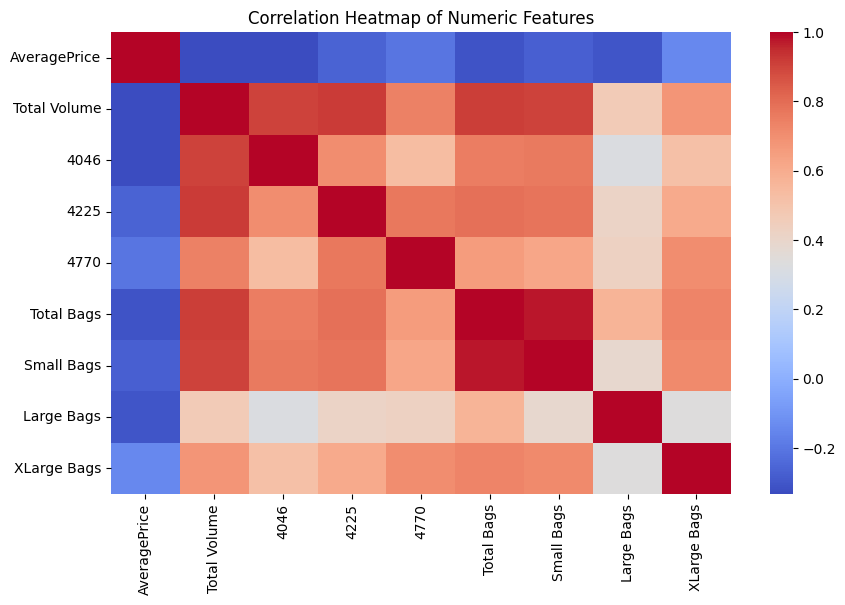


Columns in dataset: ['Date', 'AveragePrice', 'Total Volume', 4046, 4225, 4770, 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

Categorical variables: ['year', 'region', 'type']
Continuous variables: ['AveragePrice', 'Total Volume', 4046, 4225, 4770, 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

Continuous variable stats:
                                Date  AveragePrice  Total Volume  \
count                          16221  16221.000000  1.622100e+04   
mean   2016-08-13 23:27:03.894950912      1.413082  3.529436e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2015-10-25 00:00:00      1.100000  9.219970e+03   
50%              2016-08-14 00:00:00      1.380000  8.003432e+04   
75%              2017-06-04 00:00:00      1.670000  3.454368e+05   
max              2018-03-25 00:00:00      3.250000  1.121360e+07   
std                              NaN      0.408252  8.065454e+05   

               

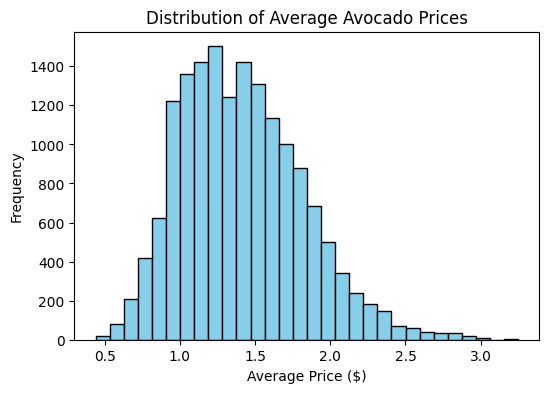

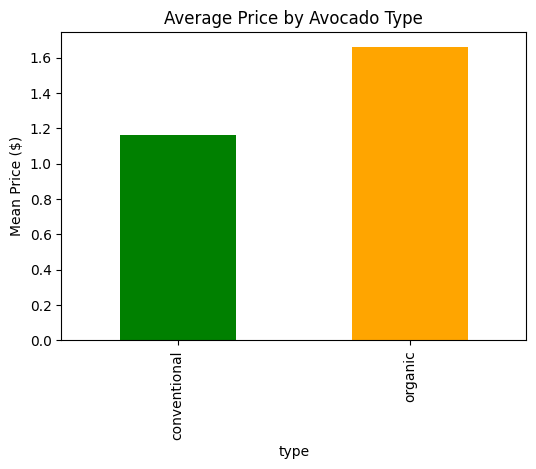

/tmp/ipython-input-2243884413.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("year")["Total Volume"].sum().plot(kind="bar", color="purple")


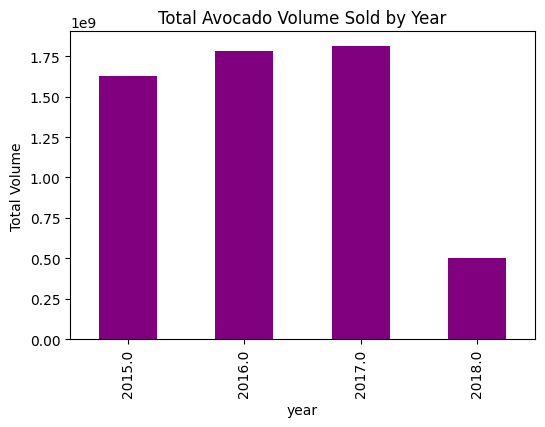


Earliest Date recorded: 2015-01-04 00:00:00
Any records <= 2010? False

Highest Average Price: 3.25 (Region: SanFrancisco)
Highest Total Volume: 11213596.29 (Region: California)


In [10]:
# ========================================
# Extra Credit Assignment - Avocado Dataset
# ========================================

# Import libraries
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())
# ---------------------------
# Load the dataset
# ---------------------------
file_path = "DS22_Avocado_Prices_Data.xlsx"   # adjust path if needed
df = pd.read_excel(file_path)

print("Initial Shape:", df.shape)
print(df.head())

# ---------------------------
# Q1: Data Quality Check
# ---------------------------

#1. Bias
# Quick overview of dataset
print("Shape of dataset (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:\n")#Prints summary statistics (mean, min, max, quartiles)
print(df.describe())

# Distribution of categorical columns (like 'region', 'type')
print("\nValue counts for 'region':\n") #Prints distribution of categorical variables (region, type) → this helps spot bias (e.g., if one region dominates)
print(df['region'].value_counts().head(10))  # show top 10

print("\nValue counts for 'type':\n")
print(df['type'].value_counts())

# Earliest and latest date: Prints earliest and latest date available (to check for time bias)
if 'Date' in df.columns:
    print("\nDate range in dataset:", df['Date'].min(), "to", df['Date'].max())


# 2. Shape of dataset
print("\nShape of dataset (rows, cols):", df.shape)

# 3. Duplicates & Missing values
duplicates = df.duplicated().sum()
print("Duplicate records:", duplicates)

missing_values = df.isnull().sum().sum()
print("Total missing values:", missing_values)

#4 # ---- Handling missing values ----
print("\nHandling missing values...")

# 1. Drop rows where more than 50% of values are missing
df_cleaned = df.dropna(thresh=df.shape[1] // 2)
print("Shape after dropping rows with too many missing values:", df_cleaned.shape)

# 2. Fill remaining missing values with median (numeric columns only)
df_filled = df_cleaned.fillna(df_cleaned.median(numeric_only=True))

# (Optional) If you want region-wise median imputation:
# df_filled = df_cleaned.groupby("region").apply(
#     lambda group: group.fillna(group.median(numeric_only=True))
# )

# Final check
print("\nMissing values after cleaning:\n", df_filled.isnull().sum())
print("Final dataset shape:", df_filled.shape)



#5: Is dataset enough to train a model?
# ---------------------------

print("\nQ5: Dataset Sufficiency\n")
rows, cols = df.shape

if rows > 10000 and cols > 10:
    sufficiency = "Yes, the dataset is large and detailed enough to train a model."
else:
    sufficiency = "No, the dataset may not be sufficient."

print(f"""
- Number of rows: {rows}
- Number of columns: {cols}
- Variables include: prices, sales volumes (4046, 4225, 4770), bags, type, year, region.
- This provides both numerical and categorical predictors.

Assessment:
{sufficiency}
""")




# ---------------------------
# Q2: Data Cleaning & Preprocessing
# ---------------------------

#1. Remove "Column 1"
if "Column 1" in df.columns:
    df = df.drop(columns=["Column 1"])

#2. Treat 'year' as categorical (nominal)
df["year"] = df["year"].astype("category")

#3. Remove duplicates
before_shape = df.shape
df = df.drop_duplicates()
after_shape = df.shape
print(f"\nShape before removing duplicates: {before_shape}")
print(f"Shape after removing duplicates: {after_shape}")

#4 Missing values check
print("\nMissing values per column:\n", df.isnull().sum())

#4.1 Drop rows with too many missing values (≥ half columns missing)
df = df.dropna(thresh=df.shape[1]//2)

#4.2 Replace remaining missing values with median per Region, else global median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df.groupby("region")[col].transform(lambda x: x.fillna(x.median()))
    df[col] = df[col].fillna(df[col].median())

#4.3 Shape of the dataset
print("\nShape after missing value handling:", df.shape)

#5 Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# ---------------------------
# Q3: Exploratory Data Analysis (EDA)
# ---------------------------

#1. Variables
print("\nColumns in dataset:", df.columns.tolist())
print("\nCategorical variables:", df.select_dtypes("category").columns.tolist() + ["region","type"])
print("Continuous variables:", df.select_dtypes(include=[np.number]).columns.tolist())

#A. Continuous variable summary
print("\nContinuous variable stats:")
print(df.describe())

#B. Categorical variable summary
print("\nUnique values in categorical variables:")
for col in ["year","region","type"]:
    print(f"{col}: {df[col].nunique()} unique → {df[col].unique()[:10]}")

#C. ---- Visualizations ----

# C1. Distribution of Average Price
plt.figure(figsize=(6,4))
plt.hist(df["AveragePrice"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Average Avocado Prices")
plt.xlabel("Average Price ($)")
plt.ylabel("Frequency")
plt.show()

# C2. Average Price by Type
plt.figure(figsize=(6,4))
df.groupby("type")["AveragePrice"].mean().plot(kind="bar", color=["green","orange"])
plt.title("Average Price by Avocado Type")
plt.ylabel("Mean Price ($)")
plt.show()

# C3. Total Volume by Year
plt.figure(figsize=(6,4))
df.groupby("year")["Total Volume"].sum().plot(kind="bar", color="purple")
plt.title("Total Avocado Volume Sold by Year")
plt.ylabel("Total Volume")
plt.show()

# 2.---- Earliest Date ----

earliest_date = df["Date"].min()
print("\nEarliest Date recorded:", earliest_date)

check_2010 = df[df["Date"].dt.year <= 2010]
print("Any records <= 2010?", not check_2010.empty)
#The first date of the avocado prices could be located with the help of the .min () function of the Date column. This role will go through the entire dates in the data and provide the oldest date. To further determine the existence of any records prior to 2010, I used the .dt.year to take off the year component of the Date column and determined whether there were any records whose year was below 2010 or equal to that of 2010. The earliest valid date (2015) is in 2015 because there were no records that were found earlier than that.#

#3 ---- Highest Average Price ----
max_price = df["AveragePrice"].max()
region_price = df.loc[df["AveragePrice"].idxmax(), "region"]
print(f"\nHighest Average Price: {max_price} (Region: {region_price})")
#To determine the maximum average price of avocados, I used the following step of utilizing the.max() function on the column of AveragePrice that provided me with the highest price value in the whole data. But it is not sufficient to know the maximum value, and I also needed to comprehend the area in which this price was registered. To this, I applied .idxmax() to locate the index (row number) of the highest price followed by the selection of the value at the region column. This won me the highest average price and the region it is located in.

#4 ---- Highest Total Volume ----
max_volume = df["Total Volume"].max()
region_volume = df.loc[df["Total Volume"].idxmax(), "region"]
print(f"Highest Total Volume: {max_volume} (Region: {region_volume})")
##On the same note, to obtain the maximum volume of avocados sold, I used the .max() function on Total Volume column to obtain the maximum volume of sales. Then, I found the row in which this maximum volume was. Using the region value at this row, I was in a position to determine the region that had the highest sales volume. This method was able to give not only the highest numbers but also the exact place of these numbers.##